# Kshitiz's Notes:
1. 12 different features
2. 891 Passengers
3. Null values in 'Age', 'Cabin' & 'Embarked'
4. Definitely a Binary Classificatin Problem.
5. Age : 891-714=177 hence ~19.8% data missing
6. Cabin : 891-204=687 hence ~77% data missing
7. The Cabin data is too much missing to work on, Hence something must be done either add the missing values or change the feature to boolean value i.e cabin_known.
8. A Lot of Male haven't Survived.
9. Using Pclass to impute Age.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

Hence, there are 891 persons with 12 different features.

# Missing values

In [5]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB






1. Null values in 'Age', 'Cabin' & 'Embarked'
2. Age : 891-714=177 hence ~19.8% data missing
3. Cabin : 891-204=687 hence ~77% data missing
4. The Cabin data is too much missing to work on!!

<AxesSubplot:>

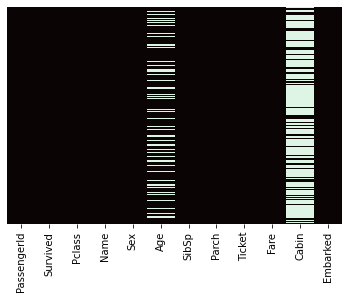

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='mako')

# Preprocessing & Data Analysis


# Gender : 

<AxesSubplot:xlabel='Survived', ylabel='count'>

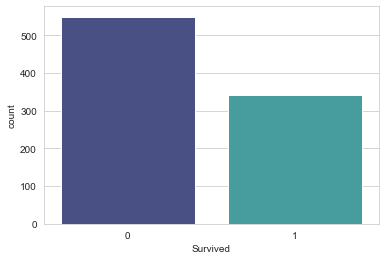

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='mako')

In [9]:
print(f"Total people survived: {train['Survived'].value_counts()[1]}/891")

Total people survived: 342/891


Male Count : 577
Female Count : 314
Count of Survived Females and Males:
      Sex  count
0  female    233
1    male    109
Count of Lost Females and Males:
      Sex  count
0  female     81
1    male    468


<AxesSubplot:xlabel='Survived', ylabel='count'>

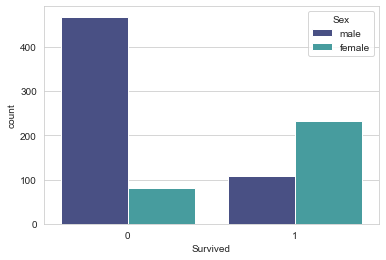

In [10]:
print(f"Male Count : {train['Sex'].value_counts()['male']}")
print(f"Female Count : {train['Sex'].value_counts()['female']}")
print("Count of Survived Females and Males:")
print(f"{train[train['Survived']==1].groupby(['Sex']).size().reset_index(name='count')}")
print("Count of Lost Females and Males:")
print(f"{train[train['Survived']==0].groupby(['Sex']).size().reset_index(name='count')}")
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='mako')

--> Sex is a very dominating feature as we can see as the ratio of Male deaths to Female deats is large.

# PClass : 

Count of Survived :
   Pclass  count
0       1    136
1       2     87
2       3    119



<AxesSubplot:xlabel='Survived', ylabel='count'>

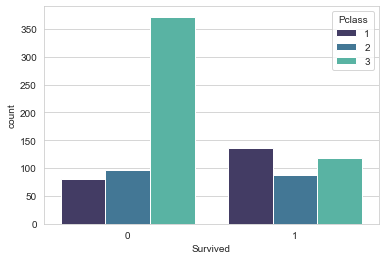

In [11]:
print("Count of Survived :")
print(f"{train[train['Survived']==1].groupby(['Pclass']).size().reset_index(name='count')}\n")

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='mako')

# Age :

Avg Age: 30



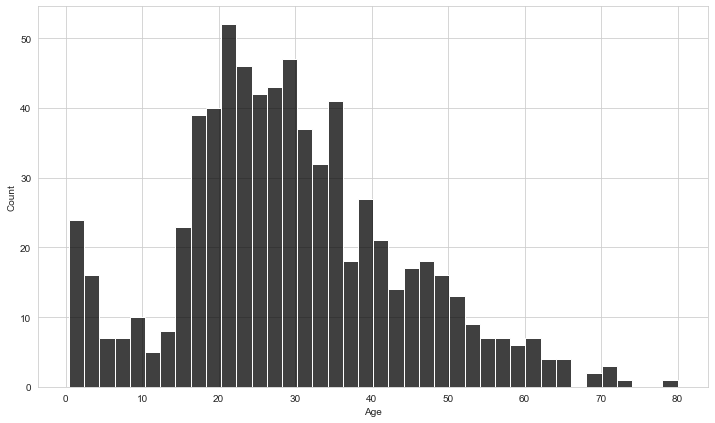

In [12]:
plt.figure(figsize=(12,7))
sns.histplot(train['Age'].dropna(),kde=False,color='black',bins=40)
print(f"Avg Age: {round(train['Age'].mean())}\n")
# sns.scatterplot(data=train, x="Age", y="Survived",palette='rocket')

# SibSp ,Parch  & Fare :

<AxesSubplot:xlabel='SibSp', ylabel='count'>

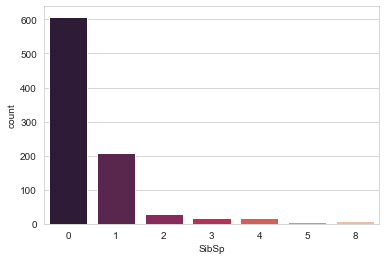

In [13]:
sns.countplot(x='SibSp',data=train,palette='rocket')

<AxesSubplot:xlabel='Parch', ylabel='count'>

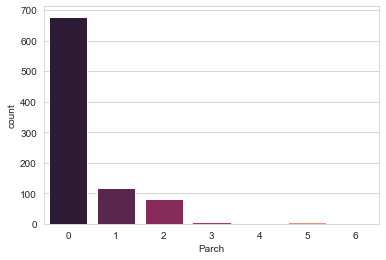

In [14]:
sns.countplot(x='Parch',data=train,palette='rocket')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

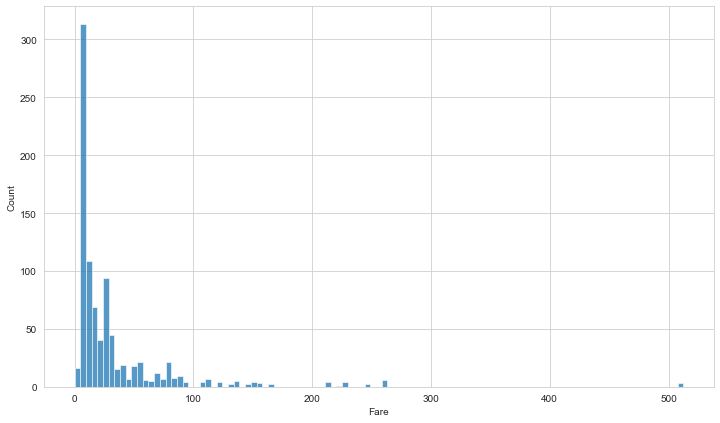

In [15]:
#sns.countplot(x='SibSp',hue='Parch',data=train,palette='rocket')
plt.figure(figsize=(12,7))
sns.histplot(x='Fare',data=train,palette='rocket')

# Data Cleaning

In [16]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


# For filling the missing Age
1. Age cannot have a co-relation with death (converse might be true)
2. Age might have a co-relation with fare (converse might be true)
3. Age might have a co-relation with Pclass (converse might be true)

In [17]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

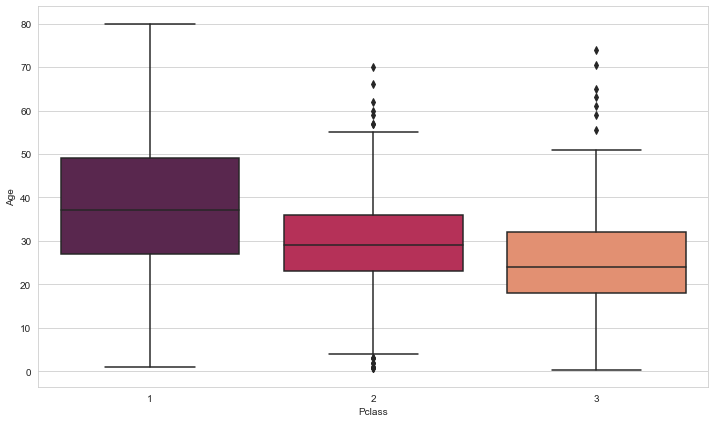

In [18]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rocket')

In [19]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


# Imputation: 
1. Imputing the 'Age' feature by replacing the null values with the average values of each of 'Pclass' Category.
2. Since no 'Pclass' value is null hence it can be done easily without any problem!

In [20]:
def imputeAge(cols):
    Age=cols[0]
    Pclass=cols[1]
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 38
        elif(Pclass==2):
            return 30
        else:
            return 25
    else:
        return Age

In [21]:
train['Age']=train[['Age','Pclass']].apply(imputeAge,axis=1)

<AxesSubplot:>

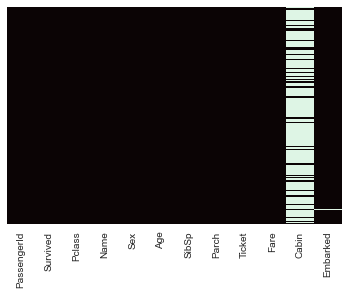

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [23]:
train.drop(train[(pd.isnull(train['Embarked']))].index, inplace=True)

In [24]:
train.drop('Cabin',axis=1,inplace=True)
# Done !!

In [25]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [29]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [32]:
train = pd.concat([train,sex,embark],axis=1)

In [33]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Scaling the 'train' dataframe :
    Using MinMaxSacling!

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
for col in train:
    mx=MinMaxScaler()
    train[col] = mx.fit_transform(train[[col]])

# Training a Logostic Regression Model

1. Since we already have a test.csv file with us we can start by considering the whole test dataframe as our training set.
2. We will be using the test.csv to make prediction upon!

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [40]:
predictions = logmodel.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
accuracy=confusion_matrix(y_test,predictions)

In [43]:
accuracy

array([[148,  15],
       [ 34,  70]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8164794007490637

In [46]:
predictions

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0.

# Evaluation: 

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       163
         1.0       0.82      0.67      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



# Things to Ponder Upon ;)
There can be other things to explore: 
1. cabin might helps us to get accurate results.
2. Using names and Tickets can help to understand the class/status and hence help us to impute cabin.
3. And so on..